In [1]:
import sys
sys.path.insert(0, '../src')

In [2]:
from analysis import *
import matplotlib.pyplot as plt

In [3]:
data = load_data()

<Axes: >

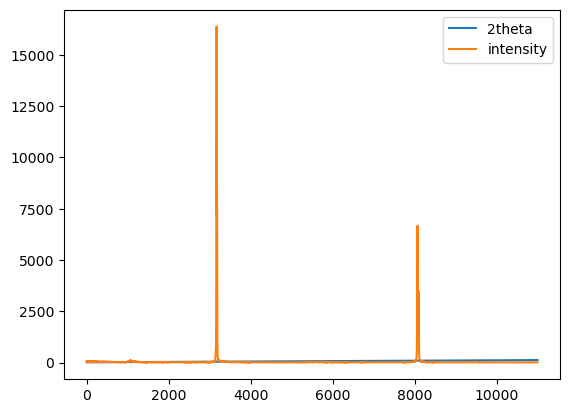

In [4]:
data.plot()

In [5]:
corr_int = linear_correction(theta=data['2theta'].values,intensity=data['intensity'].values)

Text(0, 0.5, 'Intensity (a.u.)')

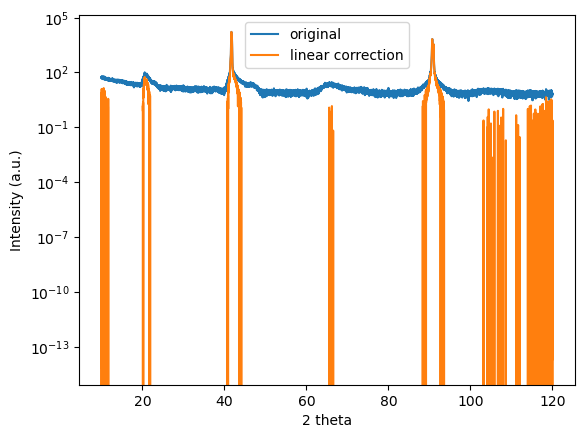

In [6]:
plt.plot(data['2theta'].values,data['intensity'].values, label='original')
plt.plot(data['2theta'].values,corr_int, label='linear correction')
plt.yscale('log')
plt.legend()
plt.xlabel('2 theta')
plt.ylabel('Intensity (a.u.)')

In [7]:
corr_int = linear_correction(theta=data['2theta'].values,intensity=data['intensity'].values, order=2)

/Users/shyamkatnagallu/Projects/XRD_analysis/notebooks/../src/analysis.py:66: RankWarning: Polyfit may be poorly conditioned
  np.polyfit([theta[0], theta[-1]], [intensity[0], intensity[-1]], order), theta


Text(0, 0.5, 'Intensity (a.u.)')

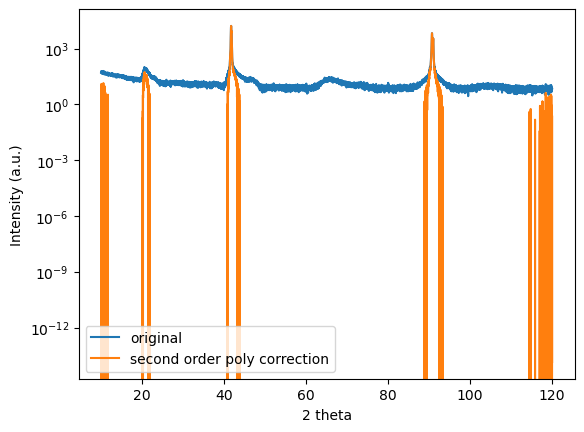

In [8]:
plt.plot(data['2theta'].values,data['intensity'].values, label='original')
plt.plot(data['2theta'].values,corr_int, label='second order poly correction')
plt.yscale('log')
plt.legend()
plt.xlabel('2 theta')
plt.ylabel('Intensity (a.u.)')

In [9]:
corr_int = median_correction(intensity=data['intensity'].values)

Text(0, 0.5, 'Intensity (a.u.)')

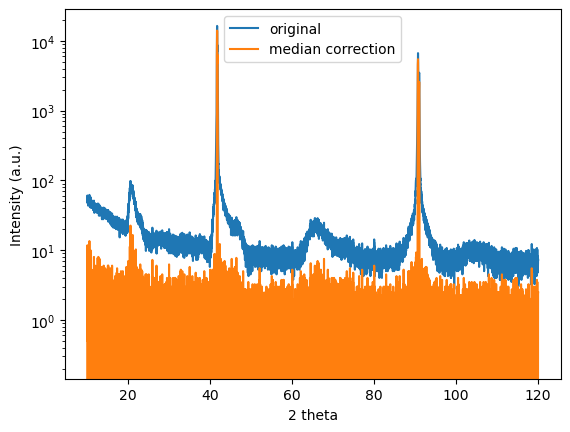

In [10]:
plt.plot(data['2theta'].values,data['intensity'].values, label='original')
plt.plot(data['2theta'].values,corr_int, label='median correction')
plt.yscale('log')
plt.legend()
plt.xlabel('2 theta')
plt.ylabel('Intensity (a.u.)')

In [11]:
corr_int = savgol_correction(intensity=data['intensity'].values,window_length=111, polyorder=2)

Text(0, 0.5, 'Intensity (a.u.)')

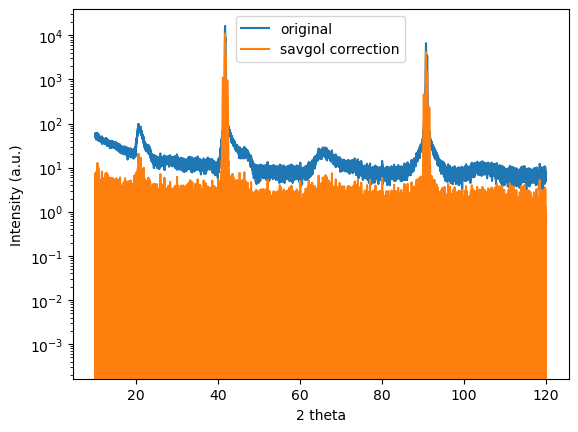

In [12]:
plt.plot(data['2theta'].values,data['intensity'].values, label='original')
plt.plot(data['2theta'].values,corr_int, label='savgol correction')
plt.yscale('log')
plt.legend()
plt.xlabel('2 theta')
plt.ylabel('Intensity (a.u.)')

In [14]:
corr_int = baseline_als_correction(intensity=data['intensity'].values, lam=1e6, p=0.01)

Text(0, 0.5, 'Intensity (a.u.)')

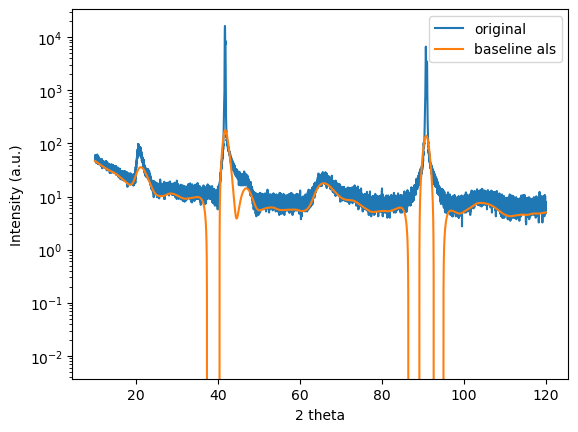

In [15]:
plt.plot(data['2theta'].values,data['intensity'].values, label='original')
plt.plot(data['2theta'].values,corr_int, label='baseline als')
plt.yscale('log')
plt.legend()
plt.xlabel('2 theta')
plt.ylabel('Intensity (a.u.)')

In [16]:
from scipy.signal import find_peaks

In [17]:
peaks, _ = find_peaks(corr_int, prominence=7, height=7, distance=10)  # Adjust these values as needed

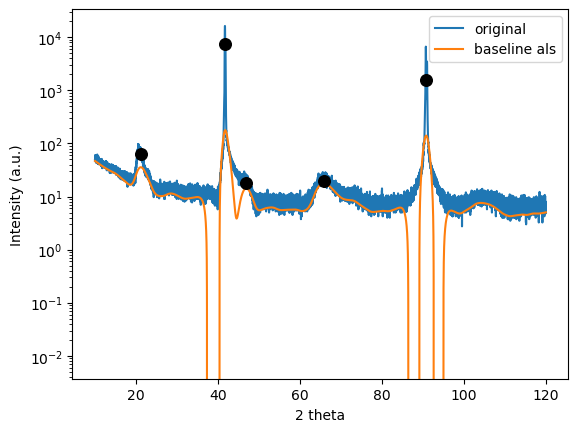

In [18]:
plt.plot(data['2theta'].values,data['intensity'].values, label='original')
plt.plot(data['2theta'].values,corr_int, label='baseline als')
plt.scatter(data['2theta'].values[peaks],data['intensity'].values[peaks], c='k', s=70, zorder=3)
plt.yscale('log')
plt.legend()
plt.xlabel('2 theta')
plt.ylabel('Intensity (a.u.)')
plt.show()

In [ ]:
data['2theta'].values[peaks]